In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('titanic_train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
df.drop(['PassengerId','Name','Ticket'], axis=1,inplace=True)

In [6]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [7]:
import seaborn as sns

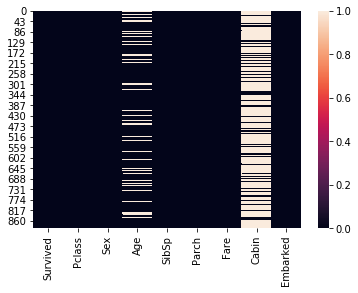

In [8]:
sns.heatmap(df.isnull())

In [9]:
df['Age'].mean()

29.69911764705882

In [10]:
df.drop('Cabin',axis=1,inplace=True)

In [11]:
df.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

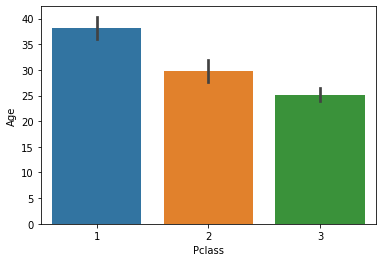

In [12]:
sns.barplot(x='Pclass',y='Age',data=df)

In [13]:
def impute_age(cols):
    p=cols[0]
    a=cols[1]
    
    if pd.isnull(a):
        if p==1:
            return 38
        
        elif p==2:
            return 30
        
        else:
            return 25
    return a

In [14]:
#if only one columns is passed axis is by default1

In [15]:
df['Age']=df[['Pclass','Age']].apply(impute_age,axis=1)

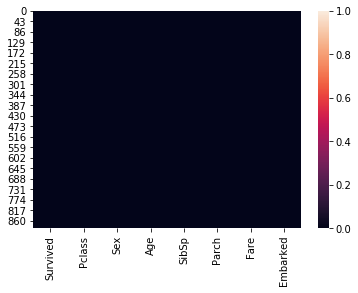

In [16]:
sns.heatmap(df.isnull())

In [17]:
sex=pd.get_dummies(df['Sex'],drop_first=True)

In [18]:
embarked=pd.get_dummies(df['Embarked'],drop_first=True)

In [19]:
df.drop(['Sex','Embarked'],axis=1,inplace=True)

In [20]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [21]:
df=pd.concat([df,sex,embarked],axis=1)

In [22]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


#to chage columns name use indexing and change

In [23]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

In [24]:
x=df.drop('Survived',axis=1)

In [25]:
y=df['Survived']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr=LogisticRegression()

# 

In [30]:
lr.fit(X_train,y_train)

D:\Programs\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
ypred=lr.predict(X_test)

In [32]:
y_test[:10]

99     0
461    0
206    0
717    1
732    0
287    0
336    0
718    0
318    1
815    0
Name: Survived, dtype: int64

In [33]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [34]:
X_test.head(2)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
99,2,34.0,1,0,26.00,1,0,1
461,3,34.0,0,0,8.05,1,0,1


In [35]:
df.groupby('Pclass')['Fare'].max()

Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64

In [36]:
print('check weather you can survive in titanic')
p1=int(input('Enter the Passenger Class'))
if(p1==1):
    p5=(float(input('enter the fare you paid max is 512')))
elif(p1==2):
    p5=(float(input('enter the fare you paid max is 74')))
else:
    p5=(float(input('enter the fare you paid max is 70')))
p2=float(input('enter the age '))
p3=int(input('enter the SibSp 0-5,8'))
p4=int(input('enter the Parch 0-6'))
p6=int(input('1.Male, 0.Female'))
coach=input('enter the coach Q,S,P')
if(coach=="Q"):
    p7=1
    p8=0
elif(coach=='S'):
    p7=0
    p8=1
else:
    p7=p8=0
    
l=[]
nl=[p1]+[p2]+[p3]+[p4]+[p5]+[p6]+[p7]+[p8]
l.append(nl)
pdf=pd.DataFrame(l,columns=X_test.columns)
result=lr.predict(pdf)
if result==1:
    print('You Survived')
else:
    print("Sorry you didnt Survive")

check weather you can survive in titanic
Enter the Passenger Class3
enter the fare you paid max is 7034
enter the age 26
enter the SibSp 0-5,84
enter the Parch 0-64
1.Male, 0.Female1
enter the coach Q,S,PQ
Sorry you didnt Survive


In [67]:
l=l.append(l)

In [69]:
l

In [73]:
pdf=pd.DataFrame(l,columns=X_test.columns)

In [74]:
pdf

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,24.0,4,5,25.0,1,0,0


In [75]:
result=lr.predict(pdf)

In [76]:
result

array([0], dtype=int64)